### Linear Regression Models to predict the closing price of the Yes Bank Stock Price

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [244]:
yes_bank_stock_price = pd.read_csv('YesBank_StockPrices.csv')

In [245]:
#Checking the shape(size) of the dataset
yes_bank_stock_price.shape

(185, 5)

In [246]:
#Example of the dataset
yes_bank_stock_price.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [247]:
#Getting the details of the feautres
yes_bank_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [248]:
#Summary of the dataset
yes_bank_stock_price.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [249]:
#Changing Date from str to datetime object
from datetime import datetime

yes_bank_stock_price['Date'] = yes_bank_stock_price['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))
yes_bank_stock_price

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


In [250]:
#Setting the index of the dataframe to the Date
yes_bank_stock_price.set_index('Date', inplace=True)
yes_bank_stock_price.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


<AxesSubplot: xlabel='Date'>

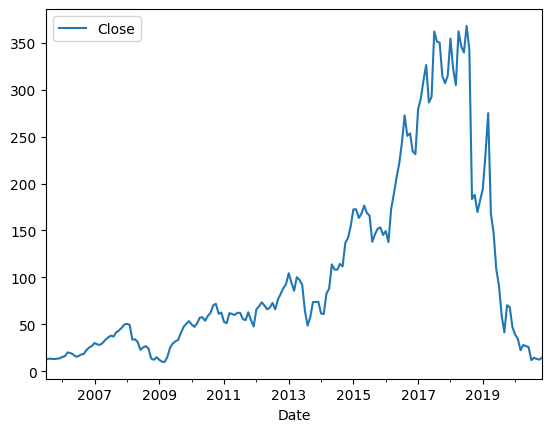

In [251]:
#Plotting the closing prices of the YSB Stock
yes_bank_stock_price.plot.line(y='Close')

<AxesSubplot: >

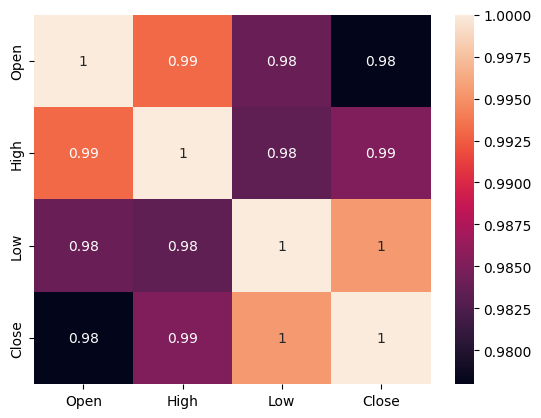

In [252]:
#Checking the correlation of all the features
sns.heatmap(yes_bank_stock_price.corr(), annot=True)

In [253]:
'''Since all the features are highly correlated with each other, 
taking an average of these features should be enough.'''

#Creating a new 'OHL' column which is the average of Open, High, and Lose columns
yes_bank_stock_price['OHL'] = yes_bank_stock_price[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [254]:
'''I have defined by own function using TimeSeriesSplit because the dataset is very small
with only 185 training examples. Hence I didn't feel to use TimeSeriesSplit'''

#function for splitting time-series data into training and testing datasets
def timeseries_train_and_test(X, y, testsize=0.2):

    test_index = int(len(X)*(1-testsize))
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, y_train, X_test, y_test

### Model 1 
*Using LinearRegression()*

*Using only OHL to predict the Closing price*

*The training-test ratio is 70-30*

In [255]:
#Splitting the dataset into training and testing dataset

#For this model I am using just the OHL column that was created to predict the closing value
X = yes_bank_stock_price.dropna()[['OHL']]
y = yes_bank_stock_price.dropna()['Close']

X_train, y_train, X_test, y_test = timeseries_train_and_test(X, y, testsize=0.3)

In [256]:
from sklearn.linear_model import LinearRegression

#Initializing the Linear Regression Model
lr = LinearRegression()
#Fitting the training data to the model
lr.fit(X_train, y_train)

LinearRegression()

In [257]:
#predicting the values for the test data
predictions = lr.predict(X_test)

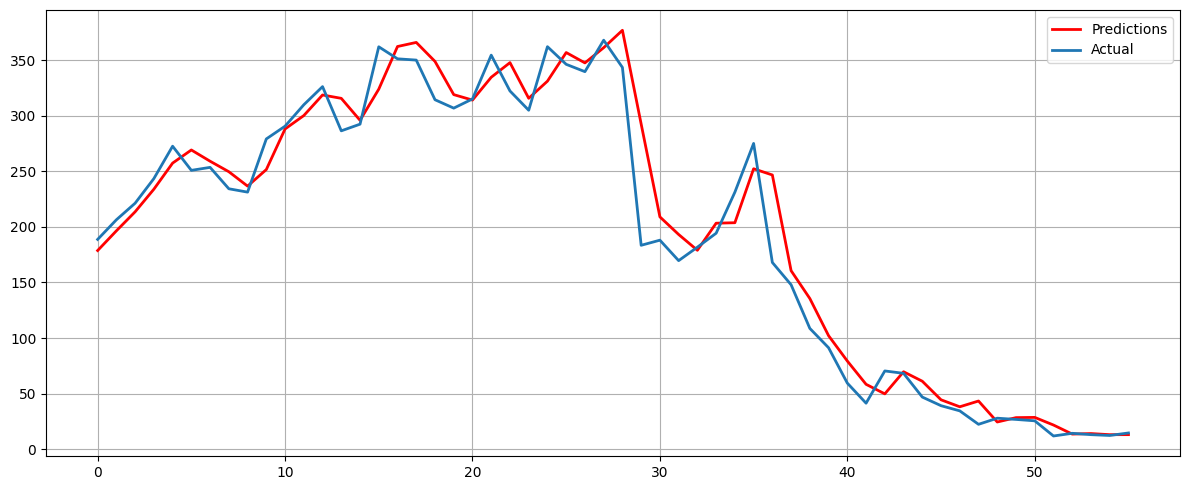

In [258]:
#Plotting the Predicted values and Actual Values and seeing how the two differ

plt.figure(figsize=(12, 5))
plt.plot(predictions, "r", label="Predictions", linewidth=2.0)
plt.plot(y_test.values, label="Actual", linewidth=2.0)
plt.legend(loc="best")
plt.tight_layout()
plt.grid(True)

In [259]:
#Evaluating our model on different popular evaluation metrics

from sklearn.metrics import (r2_score, mean_absolute_error,
                             mean_squared_error)

print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'R2 Score: {r2_score(y_test, predictions)}')

MAE: 16.157885129728722
MSE: 588.6647346507704
RMSE: 24.26241403180587
R2 Score: 0.9603891381732491


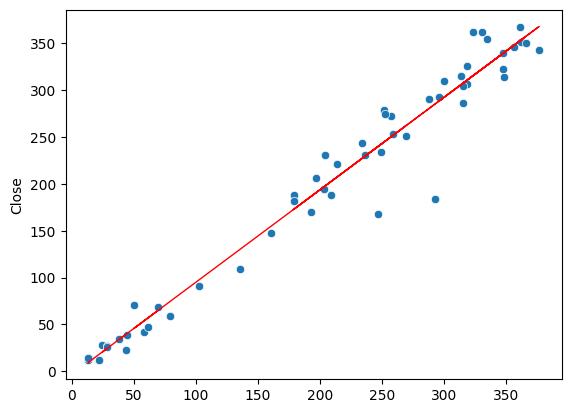

In [260]:
#Visualizing the residuals
sns.scatterplot(x=predictions, y=y_test)

z = np.polyfit(predictions, y_test, 1)
y = np.poly1d(z)(predictions)
plt.plot(predictions, y, 'r', lw=1)
plt.show()

### Model 2

*Using Lasso()*

*Using Open, High, Low to predict Closing price*

*The training-test ratio is 80-20*

In [261]:
#Splitting the dataset into training and testing dataset

#For this model I am using the Open, High, Low columns for predictions
X_ls = yes_bank_stock_price.dropna().drop(['Close', 'OHL'], axis=1)
y_ls = yes_bank_stock_price.dropna()['Close']

X_ls_train, y_ls_train, X_ls_test, y_ls_test = timeseries_train_and_test(X_ls, y_ls, testsize=0.3)

In [262]:
from sklearn.linear_model import Lasso

#Initializing the Lasso Regression Model
ls = Lasso(alpha=1.0)
#Fitting the training data to the model
ls.fit(X_ls_train, y_ls_train)

Lasso()

In [263]:
#predicting the values for the test data
predictions_ls = ls.predict(X_ls_test)

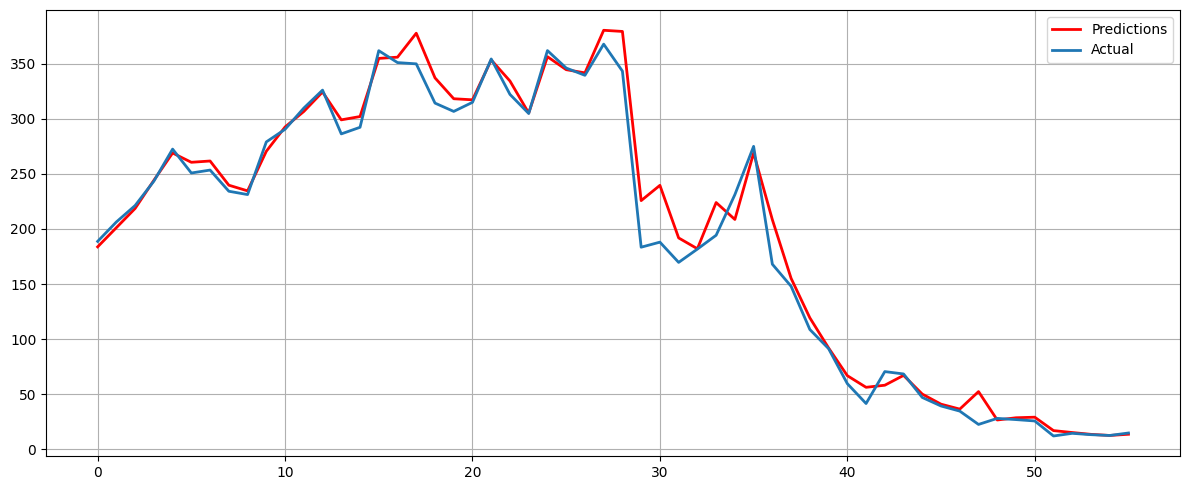

In [264]:
#Plotting the Predicted values and Actual Values and seeing how the two differ

plt.figure(figsize=(12, 5))
plt.plot(predictions_ls, "r", label="Predictions", linewidth=2.0)
plt.plot(y_ls_test.values, label="Actual", linewidth=2.0)
plt.legend(loc="best")
plt.tight_layout()
plt.grid(True)

In [265]:
#Evaluating our model on different popular evaluation metrics

print(f'MAE: {mean_absolute_error(y_ls_test, predictions_ls)}')
print(f'MSE: {mean_squared_error(y_ls_test, predictions_ls)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_ls_test, predictions_ls))}')
print(f'R2 Score: {r2_score(y_ls_test, predictions_ls)}')

MAE: 9.800467301471729
MSE: 237.9326002364829
RMSE: 15.425064026981635
R2 Score: 0.983989672223803


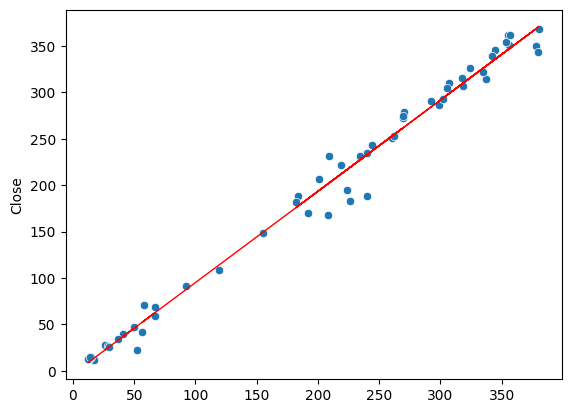

In [266]:
#Visualizing the residuals
sns.scatterplot(x=predictions_ls, y=y_ls_test)

z_ls = np.polyfit(predictions_ls, y_ls_test, 1)
y_ls = np.poly1d(z_ls)(predictions_ls)
plt.plot(predictions_ls, y_ls, 'r', lw=1)
plt.show()

### Model 3

*Using LinearRegression()*

*Using the Open, Hight, Low to predict the Closing price*

*The training-test ratio is 70-30*

In [267]:
#Splitting the dataset into training and testing dataset

#For this model I am using the Open, High, Low columns for predictions
X_2 = yes_bank_stock_price.dropna().drop(['Close', 'OHL'], axis=1)
y_2 = yes_bank_stock_price.dropna()['Close']

X_2_train, y_2_train, X_2_test, y_2_test = timeseries_train_and_test(X_2, y_2, testsize=0.3)

In [268]:
#Initializing the Linear Regression Model
lr_2 = LinearRegression()
#Fitting the training data to the model
lr_2.fit(X_2_train, y_2_train)

LinearRegression()

In [269]:
#predicting the values for the test data
predictions_2 = lr_2.predict(X_2_test)

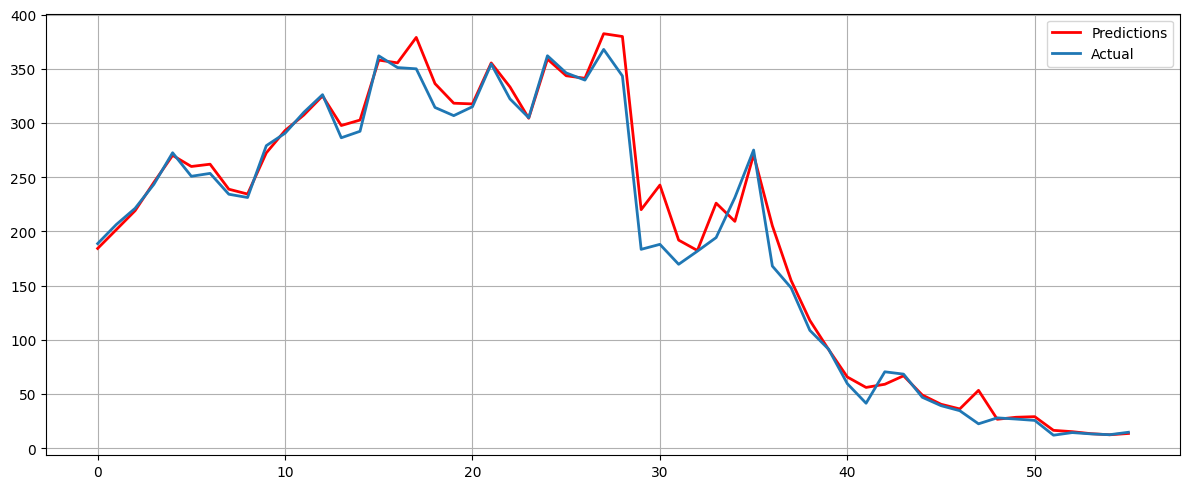

In [270]:
#Plotting the Predicted values and Actual Values and seeing how the two differ

plt.figure(figsize=(12, 5))
plt.plot(predictions_2, "r", label="Predictions", linewidth=2.0)
plt.plot(y_2_test.values, label="Actual", linewidth=2.0)
plt.legend(loc="best")
plt.tight_layout()
plt.grid(True)

In [271]:
#Evaluating our model on different popular evaluation metrics

print(f'MAE: {mean_absolute_error(y_2_test, predictions_2)}')
print(f'MSE: {mean_squared_error(y_2_test, predictions_2)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_2_test, predictions_2))}')
print(f'R2 Score: {r2_score(y_2_test, predictions_2)}')

MAE: 9.424602964278815
MSE: 231.12789809242977
RMSE: 15.202891109668245
R2 Score: 0.9844475561440282


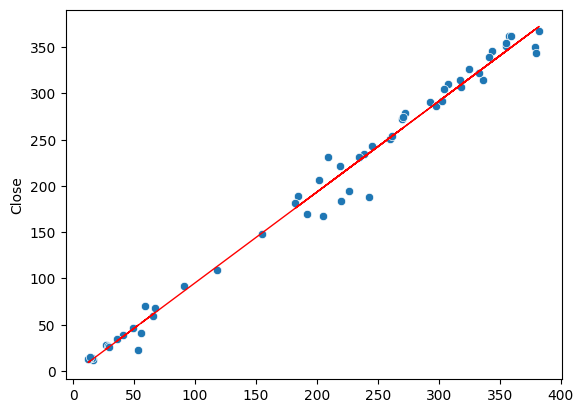

In [272]:
#Visualizing the residuals
sns.scatterplot(x=predictions_2, y=y_2_test)

z_2 = np.polyfit(predictions_2, y_2_test, 1)
y_2 = np.poly1d(z_2)(predictions_2)
plt.plot(predictions_2, y_2, 'r', lw=1)
plt.show()